In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
#pkg = mp.jupyter.open_package()
pkg = mp.jupyter.open_source_package()
#pkg

In [3]:
# Build a dataframe from the source directories, then group by the base file name, so we can c
# combine them. 
from pathlib import Path
from itertools import chain

rows = []
for fn in chain(pkg.reference('source_2019').resolved_url.fspath.glob('*.csv'), 
                pkg.reference('source_2023').resolved_url.fspath.glob('*.csv')):
    rows.append({'fn': fn.name, 'path': fn})
  
counts = None 

datasets = {}
for gn, g in pd.DataFrame(rows).groupby('fn'):
    
    frames = [ pd.read_csv(r.path) for idx, r in g.iterrows() ]
    name = gn.replace('.csv','')
    df = pd.concat(frames)
    datasets[name] = df
    
    # Write to local vars directly
    locals()[name] = df # The metapack builder expects local vars. 
    
    

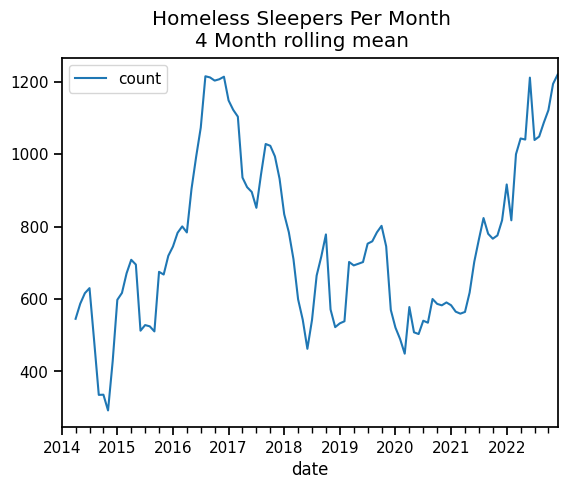

In [4]:
counts['date'] = pd.to_datetime(counts['date'])
t = counts.set_index('date').groupby(pd.Grouper(freq="MS"))['count'].sum().to_frame()
t = t.rolling(4).mean()
t.loc[t['count'] == 0,'count'] = None
t.plot()
plt.suptitle('Homeless Sleepers Per Month\n4 Month rolling mean');

In [6]:
counts = counts.sort_values(['date','neighborhood'])
counts.head()

,file_id,neighborhood,date,count,type,x,y
3501,AWIpGHhttioJR9CUJsH+L0mz0aMWrPdqcfLMEA==,east_village,2014-01-01,5,Individual,6.282334e+06,1.837657e+06
3502,AWIpGHhttioJR9CUJsH+L0mz0aMWrPdqcfLMEA==,east_village,2014-01-01,3,Individual,6.282085e+06,1.837839e+06
3503,AWIpGHhttioJR9CUJsH+L0mz0aMWrPdqcfLMEA==,east_village,2014-01-01,1,Individual,6.281976e+06,1.837916e+06
3504,AWIpGHhttioJR9CUJsH+L0mz0aMWrPdqcfLMEA==,east_village,2014-01-01,2,Individual,6.284279e+06,1.837719e+06
3505,AWIpGHhttioJR9CUJsH+L0mz0aMWrPdqcfLMEA==,east_village,2014-01-01,2,Individual,6.284486e+06,1.838048e+06


In [7]:
counts.tail()

,file_id,neighborhood,date,count,type,x,y
11778,i+lUhnoGrmHILq1ljG0edpk5zel/udPa4N0Y0A==,marina,2022-12-29,1,1,6.281369e+06,1.840167e+06
11779,i+lUhnoGrmHILq1ljG0edpk5zel/udPa4N0Y0A==,marina,2022-12-29,1,1,6.280553e+06,1.839179e+06
11780,i+lUhnoGrmHILq1ljG0edpk5zel/udPa4N0Y0A==,marina,2022-12-29,1,1,6.281193e+06,1.838961e+06
11781,i+lUhnoGrmHILq1ljG0edpk5zel/udPa4N0Y0A==,marina,2022-12-29,2,1,6.281349e+06,1.838855e+06
11782,i+lUhnoGrmHILq1ljG0edpk5zel/udPa4N0Y0A==,marina,2022-12-29,1,1,6.281170e+06,1.838715e+06
